In [16]:
# Editing mode
%load_ext autoreload
%autoreload 2

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import networkx as nx
import random
from scipy.stats import pearsonr
import GRNgene as gg
import cma
import numpy as np
import pickle as pkl
from scipy.stats import ks_2samp
from scipy.optimize import curve_fit
random.seed(1)
import functions as f

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load experimental data

In [17]:
filepath = "../data/41598_2021_3625_MOESM5_ESM.xlsx"
file = pd.read_excel(filepath)

In [18]:
# athaliana = (file["""Supplementary Table S1: Networks. A spreadsheet file with filtered networks"""].tolist()[2:], 
#                        file["Unnamed: 1"].tolist()[2:], "Arabidopsis thaliana")  # noqa : E501
# dmelanogaster = (file["Unnamed: 2"].tolist()[2:], 
#                           file["Unnamed: 3"].tolist()[2:], "Drosophila Melanogaster")  # noqa : E501
ecoli = (file["Unnamed: 4"].tolist()[2:], 
                    file["Unnamed: 5"].tolist()[2:], "Escherichnia coli")  # noqa : E501
hsapiens = (file["Unnamed: 6"].tolist()[2:], 
               file["Unnamed: 7"].tolist()[2:], "Homo sapiens")  # noqa : E501
# scerevisiae = (file["Unnamed: 8"].tolist()[2:], 
#                            file["Unnamed: 9"].tolist()[2:], "Saccharomyces cerevisiae")  # noqa : E501

# f.remove_nan_values(athaliana)
# f.remove_nan_values(dmelanogaster)
f.remove_nan_values(ecoli)
f.remove_nan_values(hsapiens)
# f.remove_nan_values(scerevisiae)

# g_athaliana = f.create_graph(athaliana)
# g_dmelanogaster = f.create_graph(dmelanogaster)
g_ecoli = f.create_graph(ecoli)
g_hsapiens = f.create_graph(hsapiens)
# g_scerevisiae = f.create_graph(scerevisiae)

# properties_athaliana = gg.network_properties(g_athaliana)
# properties_dmelanogaster = gg.network_properties(g_dmelanogaster)
properties_ecoli = gg.network_properties(g_ecoli)
properties_hsapiens = gg.network_properties(g_hsapiens)
# properties_scerevisiae = gg.network_properties(g_scerevisiae)

Fitted power law parameter: b = -1.97


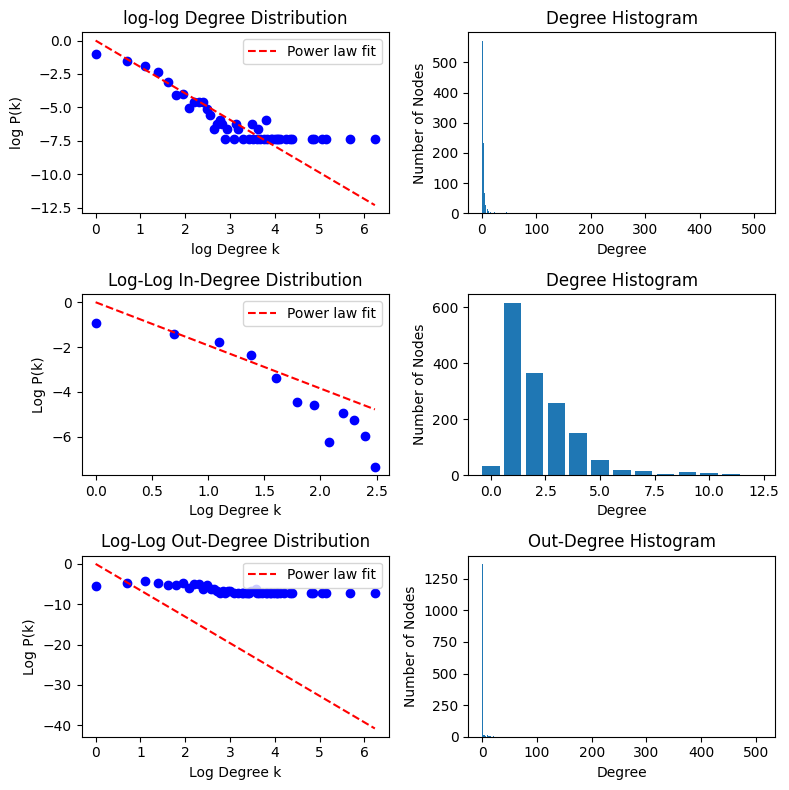

{'avg_clustering': 0.13446834151938689,
 'avg_degree': 4.506527415143603,
 'degrees': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  22,  23,  24,  27,  31,  33,  34,
         37,  38,  39,  43,  45,  46,  50,  52,  55,  58,  59,  62,  70,
         77,  80, 125, 132, 157, 173, 296, 513]),
 'density': 0.0014717594432212943,
 'degree_proba': array([0.3727154 , 0.21932115, 0.15208877, 0.09530026, 0.04438642,
        0.01762402, 0.01827676, 0.00652742, 0.00979112, 0.01044386,
        0.00979112, 0.00587467, 0.00391645, 0.00130548, 0.00195822,
        0.00261097, 0.00195822, 0.00065274, 0.00130548, 0.00065274,
        0.00195822, 0.00130548, 0.00065274, 0.00065274, 0.00195822,
        0.00065274, 0.00065274, 0.00130548, 0.00065274, 0.00065274,
        0.00261097, 0.00065274, 0.00065274, 0.00065274, 0.00065274,
        0.00065274, 0.00065274, 0.00065274, 0.00065274, 0.00065274,
        0.00065274, 0.00065274, 0.00065274, 0.00065

In [19]:
g_largest_ecoli = f.get_largest_cc(g_ecoli)
f.plot_degrees(g_largest_ecoli, plot_fit=True)
properties_largest_ecoli = gg.network_properties(g_largest_ecoli)
properties_largest_ecoli

Fitted power law parameter: b = -1.85


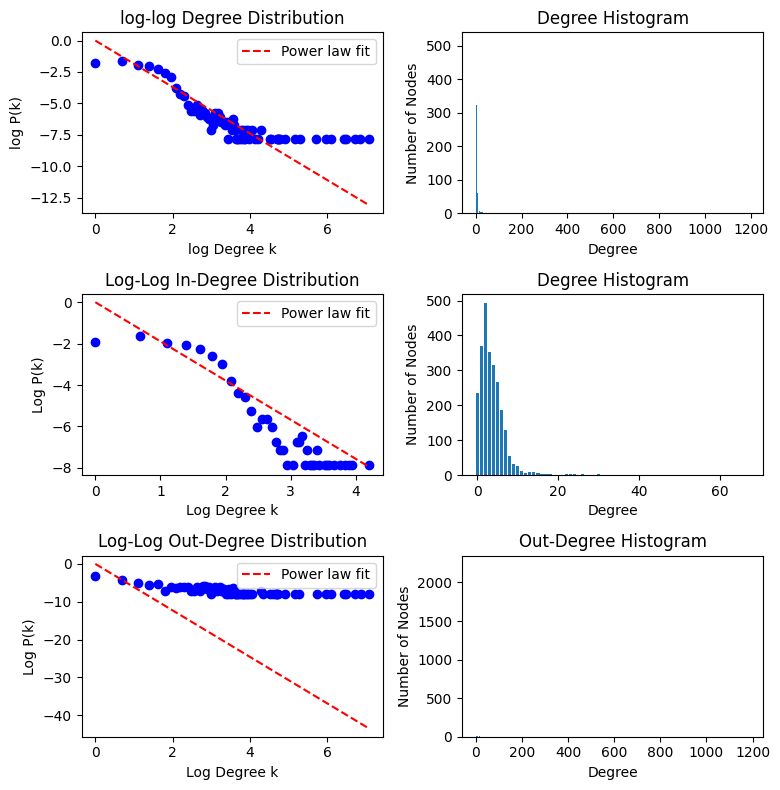

{'avg_clustering': 0.11280901692863012,
 'avg_degree': 7.552579755809374,
 'degrees': array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
          12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
          23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   34,
          35,   36,   37,   38,   39,   40,   42,   43,   44,   46,   47,
          48,   49,   52,   54,   57,   63,   67,   72,   92,   94,  110,
         113,  114,  116,  118,  134,  176,  200,  306,  390,  448,  617,
         651,  830,  956, 1193]),
 'density': 0.0014878998730908932,
 'degree_proba': array([0.16935801, 0.20283576, 0.14178811, 0.12760929, 0.10594722,
        0.07325719, 0.05317054, 0.02363135, 0.01457267, 0.01260339,
        0.00590784, 0.0035447 , 0.0035447 , 0.00590784, 0.00275699,
        0.00393856, 0.00315085, 0.00236314, 0.00196928, 0.00078771,
        0.00118157, 0.00315085, 0.00196928, 0.00315085, 0.00236314,
        0.00157542, 0.00157542, 0.00157542, 0.

In [20]:
g_largest_hsapiens = f.get_largest_cc(g_hsapiens)
f.plot_degrees(g_largest_hsapiens, plot_fit=True)
properties_largest_hsapiens = gg.network_properties(g_largest_hsapiens)
properties_largest_hsapiens

# Ecoli size

Fitted power law parameter: b = -2.51


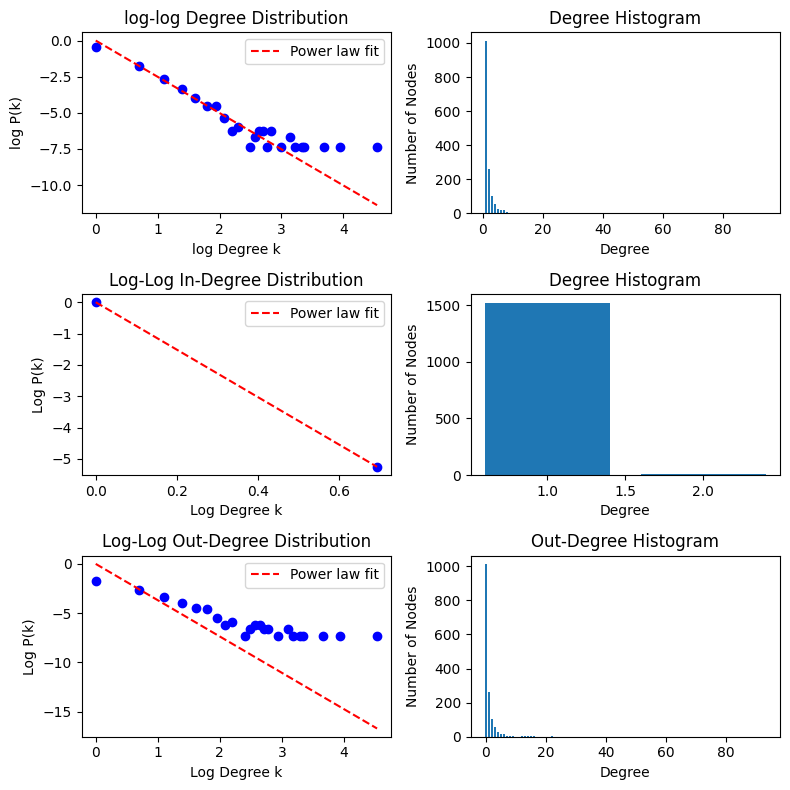

{'avg_clustering': 0.0,
 'avg_degree': 2.010443864229765,
 'degrees': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13, 14, 15, 16, 17, 20,
        23, 25, 28, 29, 40, 52, 94]),
 'density': 0.0006565786623872518,
 'degree_proba': array([6.60574413e-01, 1.71671018e-01, 6.78851175e-02, 3.59007833e-02,
        1.82767624e-02, 1.10966057e-02, 1.10966057e-02, 4.56919060e-03,
        1.95822454e-03, 2.61096606e-03, 6.52741514e-04, 1.30548303e-03,
        1.95822454e-03, 1.95822454e-03, 6.52741514e-04, 1.95822454e-03,
        6.52741514e-04, 1.30548303e-03, 6.52741514e-04, 6.52741514e-04,
        6.52741514e-04, 6.52741514e-04, 6.52741514e-04, 6.52741514e-04]),
 'modularity_value': 0.9370806510859181,
 'nb_edges': 1540,
 'nb_nodes': 1532,
 'strongly_connected': False,
 'weakly_connected': True}

In [21]:
n_nodes = 1532
node_init = 1
G_ba = nx.barabasi_albert_graph(n_nodes, node_init)

G_ba_directed = gg.adjacenteDiMatriceStaredFromGraph(
    G_ba,
    autoRG=0.0,   # self-loop probability
    duoRG=0.005    # bidirectional edge probability
)

grn_properties_G_ba = gg.network_properties(G_ba_directed[0])
f.plot_degrees(G_ba_directed[0], plot_fit=True)
grn_properties_G_ba

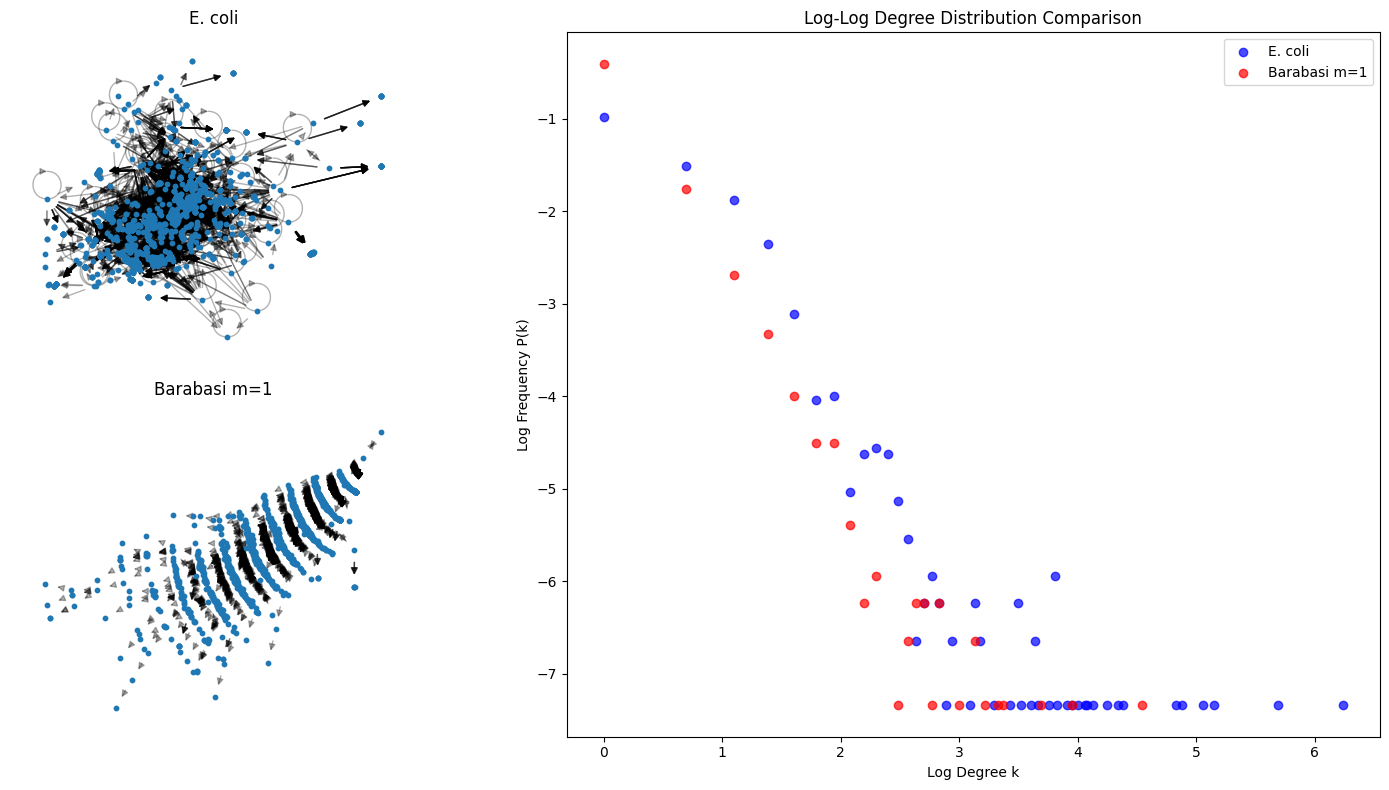

In [22]:
gg.plot_degree_network(g_largest_ecoli, G_ba_directed[0],'E. coli', 'Barabasi m=1')

Fitted power law parameter: b = -1.48


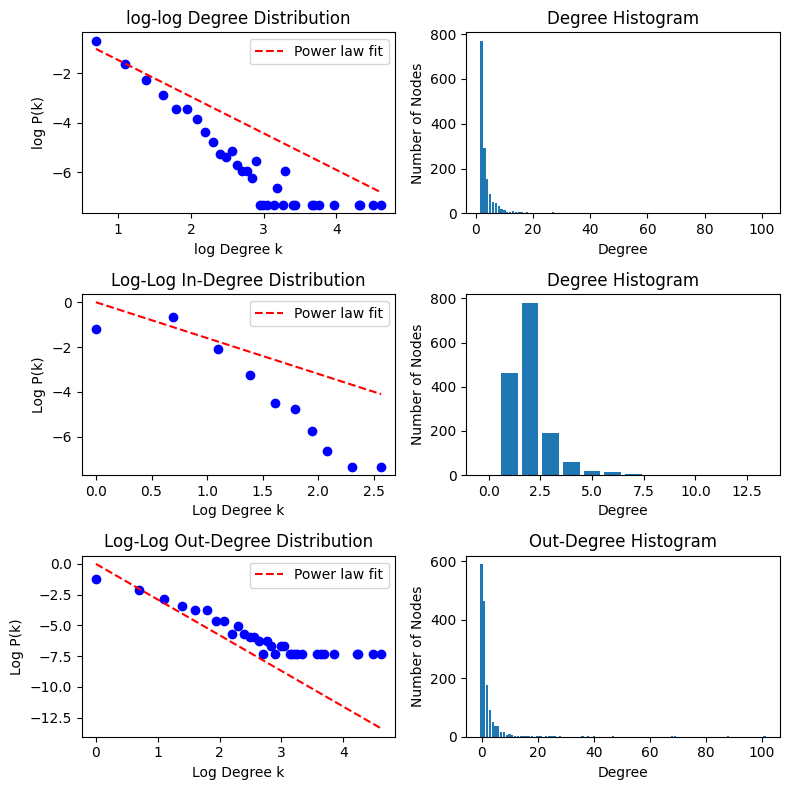

{'avg_clustering': 0.011828189123078738,
 'avg_degree': 4.011749347258486,
 'degrees': array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
         15,  16,  17,  18,  19,  20,  21,  23,  24,  26,  27,  30,  31,
         39,  40,  43,  53,  74,  75,  90, 101]),
 'density': 0.001310172876309107,
 'degree_proba': array([0.50195822, 0.19125326, 0.10052219, 0.05678851, 0.03198433,
        0.03133159, 0.02154047, 0.01240209, 0.00848564, 0.00522193,
        0.00456919, 0.00587467, 0.00326371, 0.00261097, 0.00261097,
        0.00195822, 0.00391645, 0.00065274, 0.00065274, 0.00065274,
        0.00065274, 0.00130548, 0.00065274, 0.00261097, 0.00065274,
        0.00065274, 0.00065274, 0.00065274, 0.00065274, 0.00065274,
        0.00065274, 0.00065274, 0.00065274, 0.00065274]),
 'modularity_value': 0.5304450211457131,
 'nb_edges': 3073,
 'nb_nodes': 1532,
 'strongly_connected': False,
 'weakly_connected': True}

In [23]:
node_init = 2
G_ba = nx.barabasi_albert_graph(n_nodes, node_init)

G_ba_directed = gg.adjacenteDiMatriceStaredFromGraph(
    G_ba,
    autoRG=0.0,   # self-loop probability
    duoRG=0.005    # bidirectional edge probability
)

grn_properties_G_ba = gg.network_properties(G_ba_directed[0])
f.plot_degrees(G_ba_directed[0], plot_fit=True)
grn_properties_G_ba

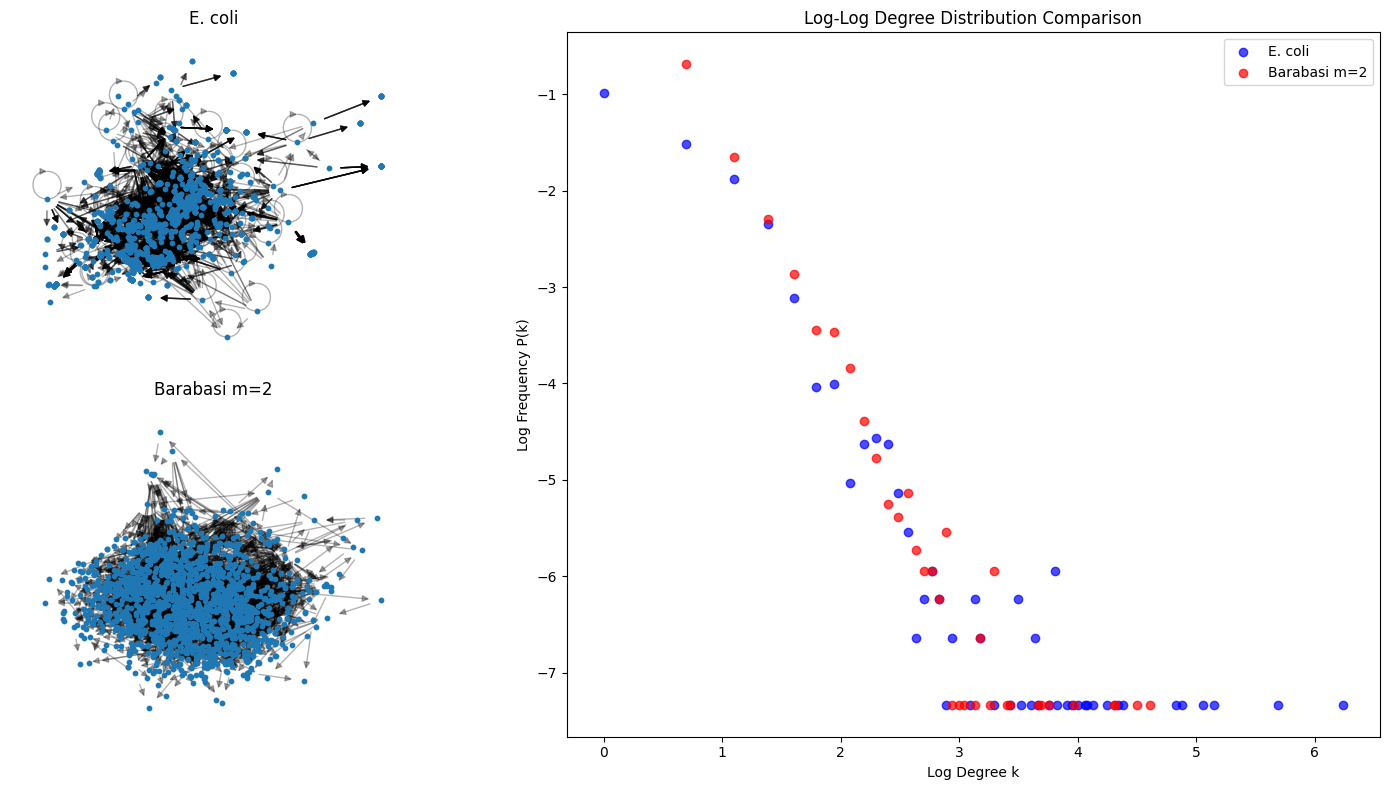

In [24]:
gg.plot_degree_network(g_largest_ecoli, G_ba_directed[0],'E. coli', 'Barabasi m=2')

Fitted power law parameter: b = -1.30


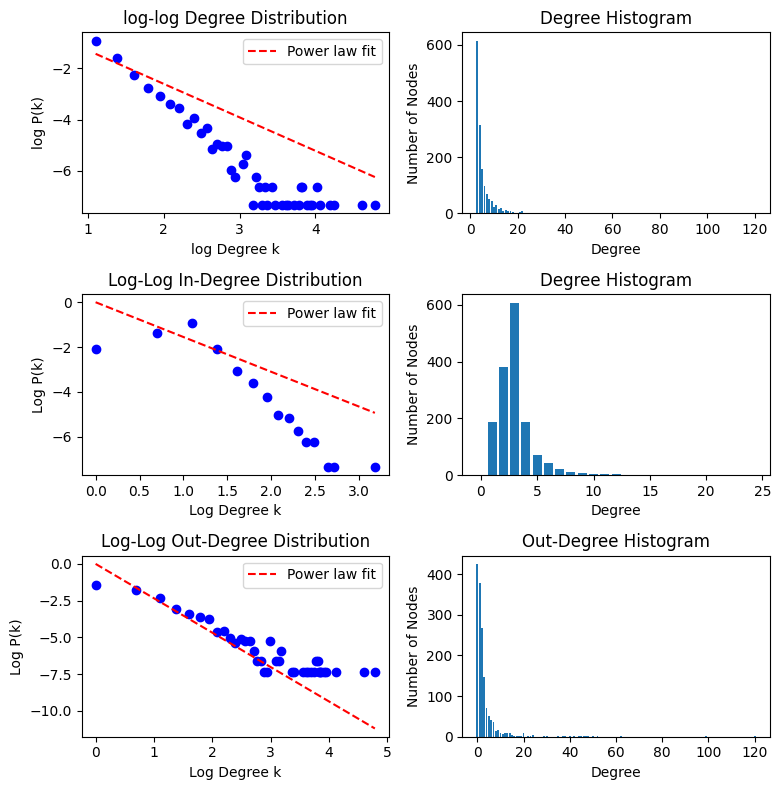

{'avg_clustering': 0.01198824804038712,
 'avg_degree': 6.0248041775456915,
 'degrees': array([  3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
         16,  17,  18,  19,  21,  22,  24,  25,  26,  27,  28,  29,  31,
         32,  35,  37,  38,  41,  44,  45,  46,  49,  51,  52,  56,  58,
         66,  70, 101, 120]),
 'density': 0.001967604238257901,
 'degree_proba': array([0.40078329, 0.20626632, 0.10313316, 0.06266319, 0.04569191,
        0.03394256, 0.02872063, 0.0156658 , 0.01958225, 0.01109661,
        0.01305483, 0.00587467, 0.00718016, 0.00652742, 0.00652742,
        0.00261097, 0.00195822, 0.00326371, 0.00456919, 0.00065274,
        0.00195822, 0.00130548, 0.00065274, 0.00130548, 0.00065274,
        0.00130548, 0.00065274, 0.00065274, 0.00065274, 0.00065274,
        0.00065274, 0.00065274, 0.00130548, 0.00130548, 0.00065274,
        0.00065274, 0.00065274, 0.00130548, 0.00065274, 0.00065274,
        0.00065274, 0.00065274, 0.00065274]),
 'modularity_value': 0.39

In [25]:
node_init = 3
G_ba = nx.barabasi_albert_graph(n_nodes, node_init)

G_ba_directed = gg.adjacenteDiMatriceStaredFromGraph(
    G_ba,
    autoRG=0.0,   # self-loop probability
    duoRG=0.005    # bidirectional edge probability
)

grn_properties_G_ba = gg.network_properties(G_ba_directed[0])
f.plot_degrees(G_ba_directed[0], plot_fit=True)
grn_properties_G_ba

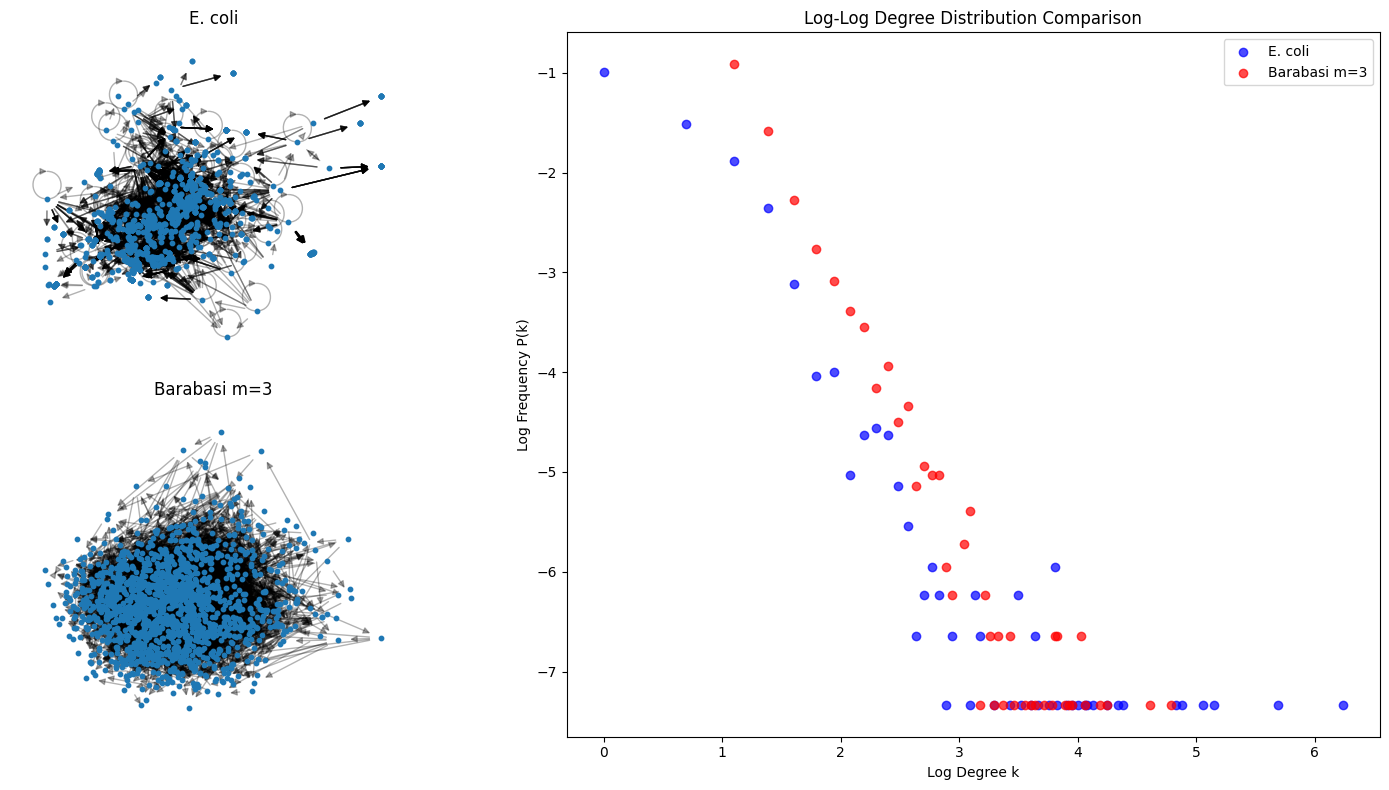

In [26]:
gg.plot_degree_network(g_largest_ecoli, G_ba_directed[0],'E. coli', 'Barabasi m=3')

Fitted power law parameter: b = -1.24


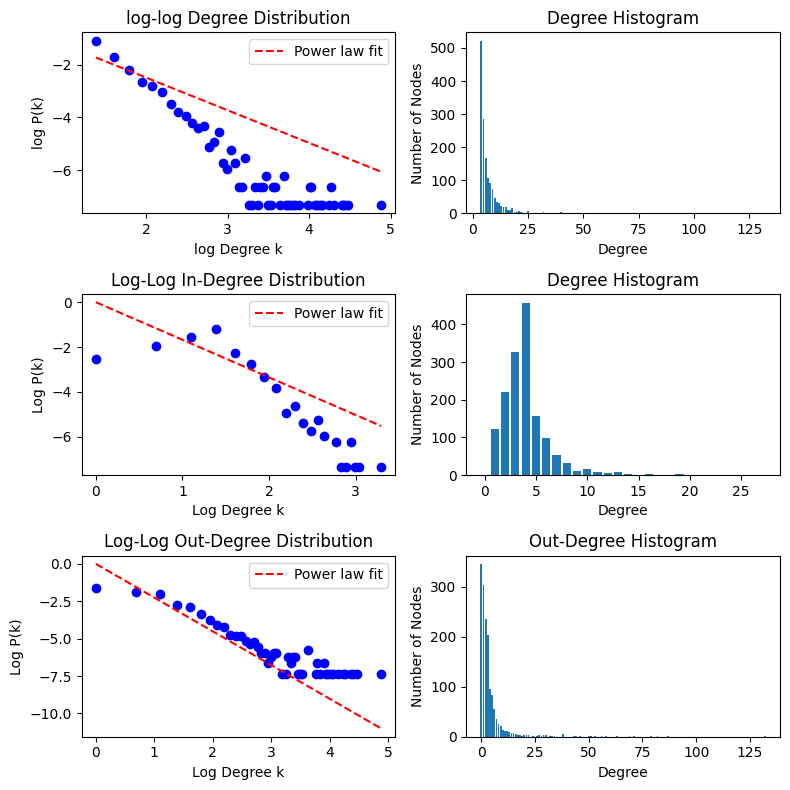

{'avg_clustering': 0.01172408706874013,
 'avg_degree': 8.031331592689295,
 'degrees': array([  4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,
         17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
         30,  31,  32,  33,  34,  35,  36,  38,  40,  41,  42,  43,  45,
         46,  48,  54,  55,  56,  59,  60,  62,  64,  70,  71,  74,  82,
         83,  85,  88, 132]),
 'density': 0.0026229038513028396,
 'degree_proba': array([0.34007833, 0.18537859, 0.10966057, 0.07049608, 0.05939948,
        0.04765013, 0.03002611, 0.02284595, 0.01958225, 0.01501305,
        0.01240209, 0.01305483, 0.00587467, 0.00718016, 0.01044386,
        0.00326371, 0.00261097, 0.00522193, 0.00326371, 0.00130548,
        0.00130548, 0.00391645, 0.00065274, 0.00065274, 0.00130548,
        0.00065274, 0.00130548, 0.00130548, 0.00195822, 0.00065274,
        0.00065274, 0.00130548, 0.00130548, 0.00065274, 0.00195822,
        0.00065274, 0.00065274, 0.00065274, 0.00065274, 0.00065274

In [27]:
node_init = 4
G_ba = nx.barabasi_albert_graph(n_nodes, node_init)

G_ba_directed = gg.adjacenteDiMatriceStaredFromGraph(
    G_ba,
    autoRG=0.0,   # self-loop probability
    duoRG=0.005    # bidirectional edge probability
)

grn_properties_G_ba = gg.network_properties(G_ba_directed[0])
f.plot_degrees(G_ba_directed[0], plot_fit=True)
grn_properties_G_ba

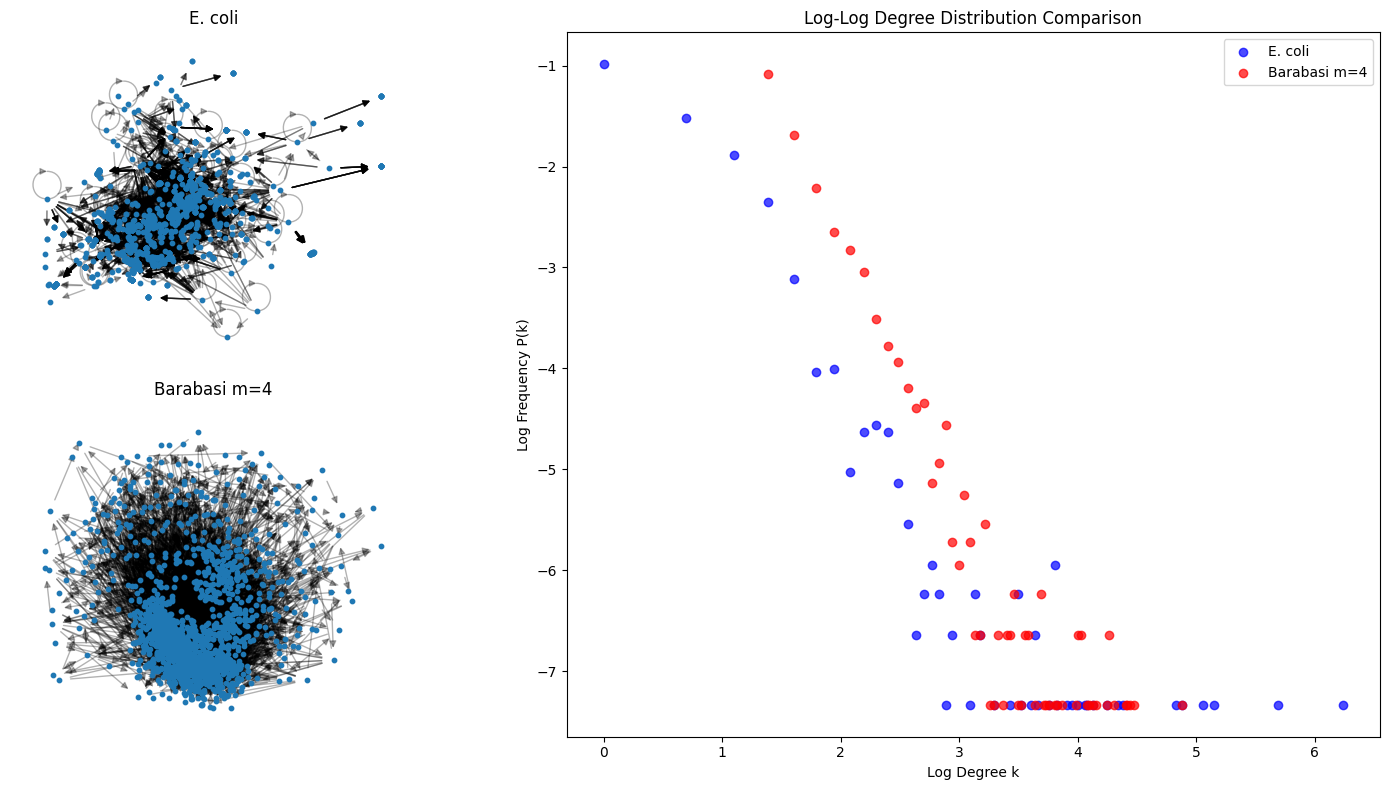

In [28]:
gg.plot_degree_network(g_largest_ecoli, G_ba_directed[0],'E. coli', 'Barabasi m=4')

# Human size

Fitted power law parameter: b = -2.54


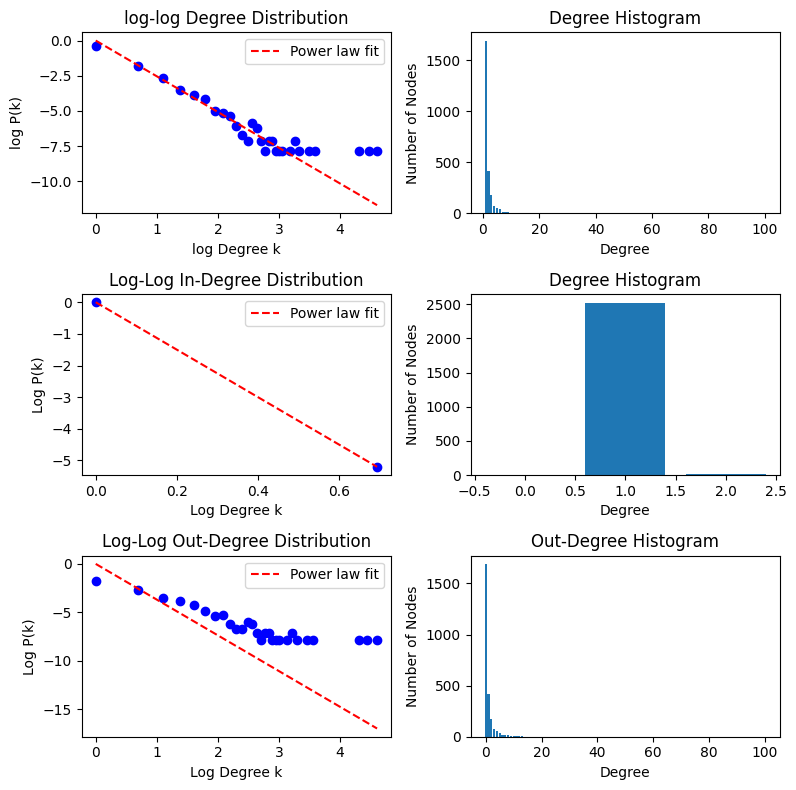

{'avg_clustering': 0.0,
 'avg_degree': 2.010240252067743,
 'degrees': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  24,  26,  28,  33,  36,
         75,  87, 100]),
 'density': 0.0003960284184530621,
 'degree_proba': array([6.64434817e-01, 1.65025601e-01, 6.97124852e-02, 3.03269004e-02,
        2.12682158e-02, 1.53603781e-02, 6.69554943e-03, 5.90783773e-03,
        4.72627019e-03, 2.36313509e-03, 1.18156755e-03, 7.87711698e-04,
        2.75699094e-03, 1.96927924e-03, 7.87711698e-04, 3.93855849e-04,
        7.87711698e-04, 7.87711698e-04, 3.93855849e-04, 3.93855849e-04,
        3.93855849e-04, 3.93855849e-04, 7.87711698e-04, 3.93855849e-04,
        3.93855849e-04, 3.93855849e-04, 3.93855849e-04, 3.93855849e-04,
        3.93855849e-04]),
 'modularity_value': 0.9495135718016021,
 'nb_edges': 2552,
 'nb_nodes': 2539,
 'strongly_connected': False,
 'weakly_connected': True}

In [37]:
n_nodes = 2539
node_init = 1
G_ba = nx.barabasi_albert_graph(n_nodes, node_init)

G_ba_directed = gg.adjacenteDiMatriceStaredFromGraph(
    G_ba,
    autoRG=0.0,   # self-loop probability
    duoRG=0.005    # bidirectional edge probability
)

grn_properties_G_ba = gg.network_properties(G_ba_directed[0])
f.plot_degrees(G_ba_directed[0], plot_fit=True)
grn_properties_G_ba

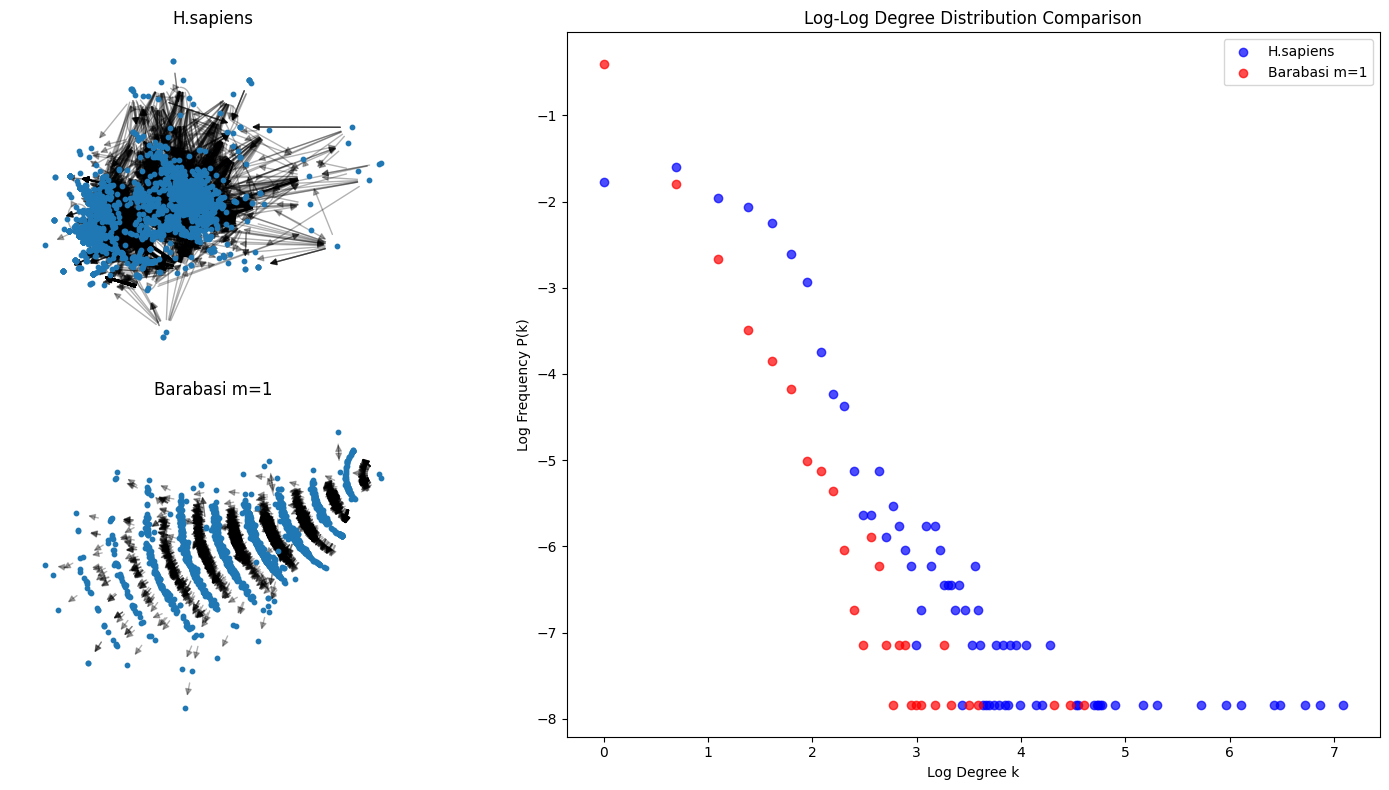

In [38]:
gg.plot_degree_network(g_largest_hsapiens, G_ba_directed[0],'H.sapiens', 'Barabasi m=1')

Fitted power law parameter: b = -1.48


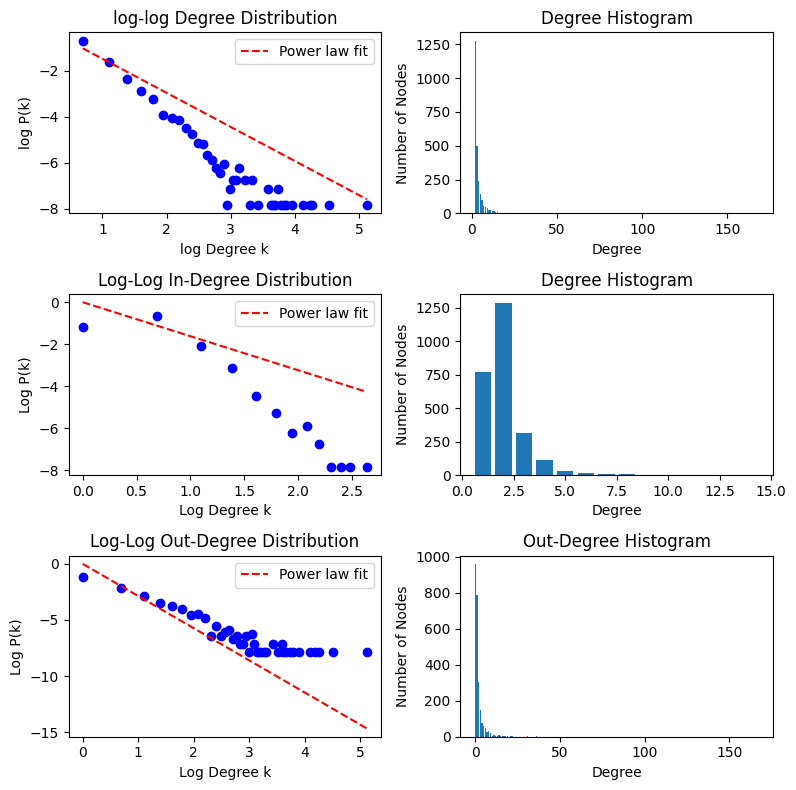

{'avg_clustering': 0.008502824076773505,
 'avg_degree': 4.02441906262308,
 'degrees': array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
         15,  16,  17,  18,  19,  20,  21,  22,  23,  25,  27,  28,  31,
         36,  38,  39,  40,  42,  44,  46,  48,  52,  62,  69,  72,  93,
        168]),
 'density': 0.0007928327546538771,
 'degree_proba': array([5.01772351e-01, 1.96140213e-01, 9.29499803e-02, 5.71090981e-02,
        4.01732966e-02, 2.00866483e-02, 1.77235132e-02, 1.57542340e-02,
        1.10279638e-02, 8.66482867e-03, 5.90783773e-03, 5.51398188e-03,
        3.54470264e-03, 2.75699094e-03, 1.96927924e-03, 1.57542340e-03,
        2.36313509e-03, 3.93855849e-04, 7.87711698e-04, 1.18156755e-03,
        1.18156755e-03, 1.96927924e-03, 1.18156755e-03, 3.93855849e-04,
        1.18156755e-03, 3.93855849e-04, 7.87711698e-04, 3.93855849e-04,
        3.93855849e-04, 3.93855849e-04, 7.87711698e-04, 3.93855849e-04,
        3.93855849e-04, 3.93855849e-04, 3.93855849e-04

In [39]:
n_nodes = 2539
node_init = 2
G_ba = nx.barabasi_albert_graph(n_nodes, node_init)

G_ba_directed = gg.adjacenteDiMatriceStaredFromGraph(
    G_ba,
    autoRG=0.0,   # self-loop probability
    duoRG=0.005    # bidirectional edge probability
)

grn_properties_G_ba = gg.network_properties(G_ba_directed[0])
f.plot_degrees(G_ba_directed[0], plot_fit=True)
grn_properties_G_ba

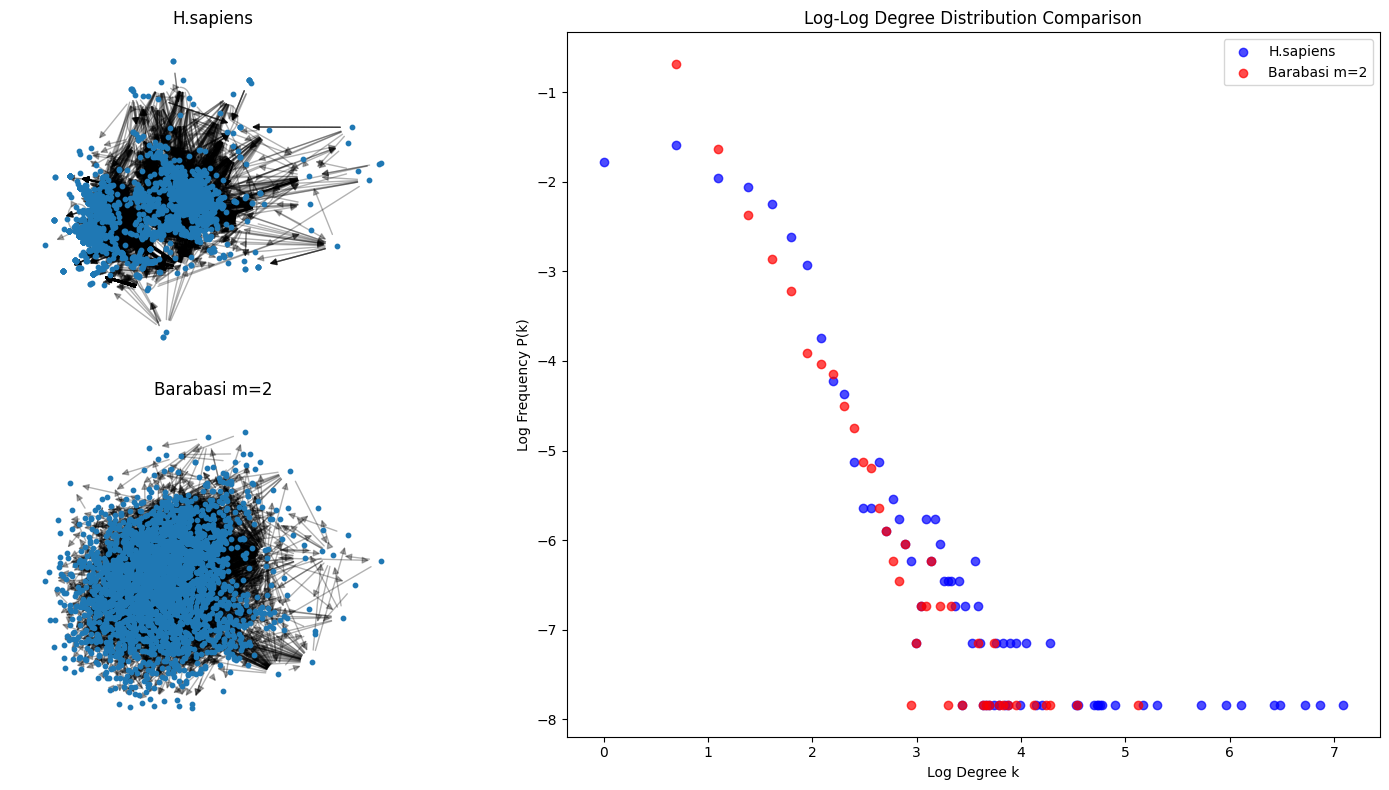

In [40]:
gg.plot_degree_network(g_largest_hsapiens, G_ba_directed[0],'H.sapiens', 'Barabasi m=2')

Fitted power law parameter: b = -1.31


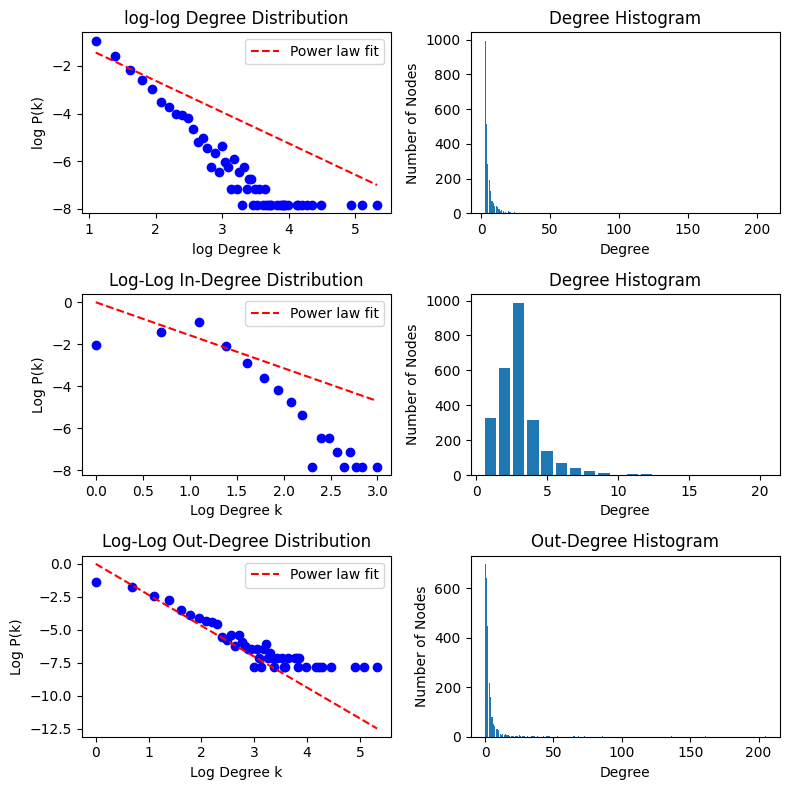

{'avg_clustering': 0.009551618006137396,
 'avg_degree': 6.033871602993305,
 'degrees': array([  3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
         16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
         29,  30,  31,  32,  33,  34,  35,  37,  38,  39,  40,  41,  42,
         46,  48,  49,  50,  51,  52,  54,  62,  63,  67,  72,  78,  89,
        139, 165, 206]),
 'density': 0.0011887059895573887,
 'degree_proba': array([0.390705  , 0.20204805, 0.11303663, 0.07562032, 0.0508074 ,
        0.02914533, 0.02402521, 0.01772351, 0.0169358 , 0.01496652,
        0.00945254, 0.00551398, 0.00669555, 0.00433241, 0.00196928,
        0.0035447 , 0.00157542, 0.00472627, 0.00236314, 0.00196928,
        0.00078771, 0.00275699, 0.00078771, 0.00157542, 0.00039386,
        0.00196928, 0.00078771, 0.00118157, 0.00118157, 0.00039386,
        0.00078771, 0.00039386, 0.00078771, 0.00039386, 0.00078771,
        0.00039386, 0.00039386, 0.00039386, 0.00039386, 0.00039386,
  

In [41]:
n_nodes = 2539
node_init = 3
G_ba = nx.barabasi_albert_graph(n_nodes, node_init)

G_ba_directed = gg.adjacenteDiMatriceStaredFromGraph(
    G_ba,
    autoRG=0.0,   # self-loop probability
    duoRG=0.005    # bidirectional edge probability
)

grn_properties_G_ba = gg.network_properties(G_ba_directed[0])
f.plot_degrees(G_ba_directed[0], plot_fit=True)
grn_properties_G_ba

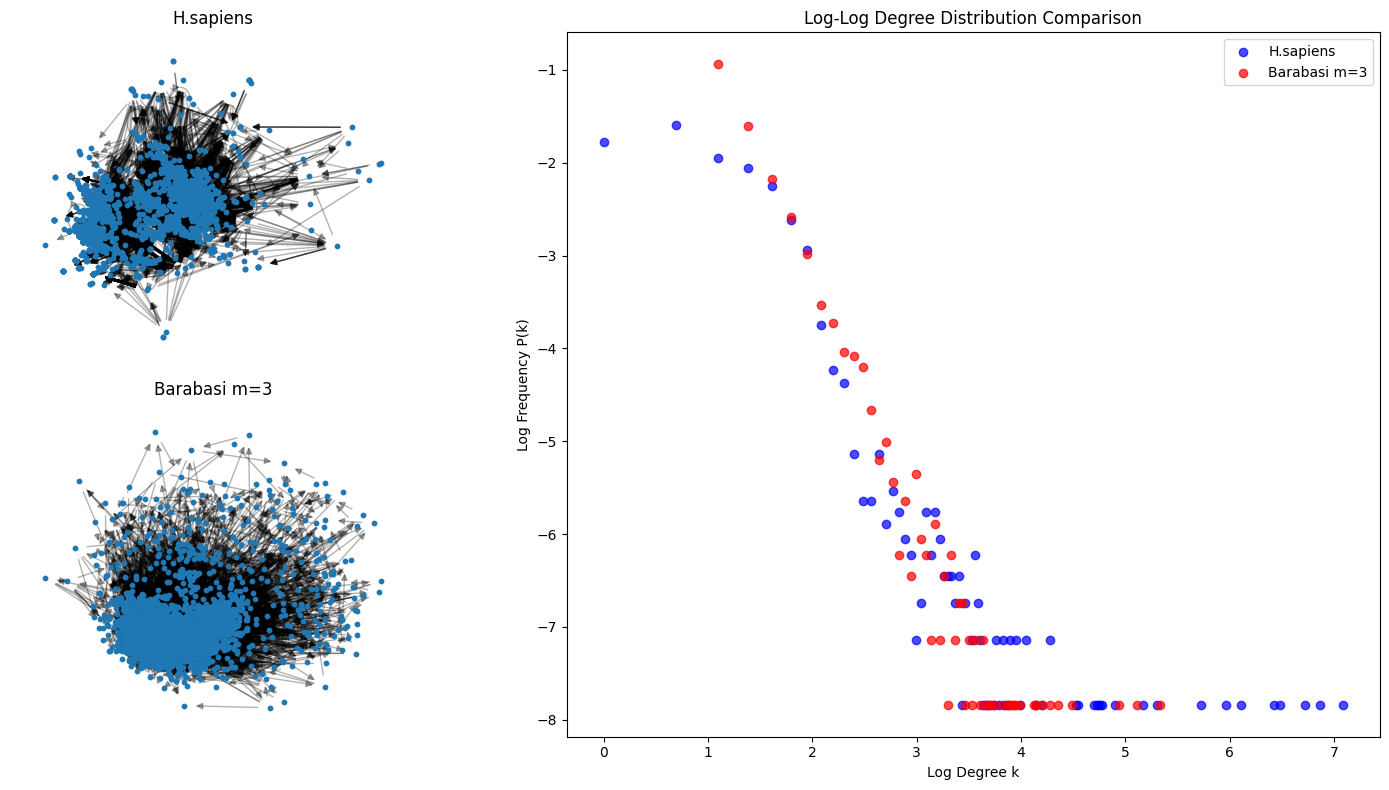

In [42]:
gg.plot_degree_network(g_largest_hsapiens, G_ba_directed[0],'H.sapiens', 'Barabasi m=3')

Fitted power law parameter: b = -2.05


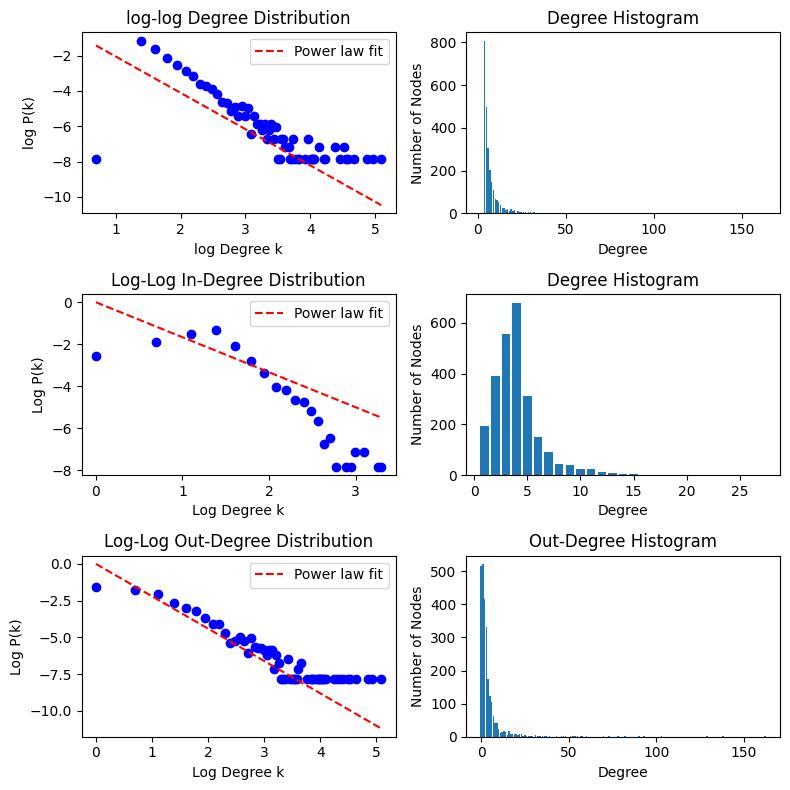

{'avg_clustering': 0.008471353015841045,
 'avg_degree': 8.039385584875935,
 'degrees': array([  2,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
         16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
         29,  30,  31,  32,  33,  34,  35,  36,  37,  39,  40,  41,  42,
         43,  45,  46,  50,  53,  55,  56,  57,  58,  62,  67,  69,  80,
         86,  92,  94,  97, 107, 131, 143, 163]),
 'density': 0.0015838033067131472,
 'degree_proba': array([0.00039386, 0.31744781, 0.19614021, 0.12012603, 0.07955888,
        0.0571091 , 0.04293029, 0.0267822 , 0.02481292, 0.0204805 ,
        0.01575423, 0.0098464 , 0.00905868, 0.00590784, 0.00748326,
        0.00433241, 0.00787712, 0.00433241, 0.00708941, 0.00157542,
        0.00433241, 0.00275699, 0.00275699, 0.00196928, 0.00275699,
        0.00118157, 0.00196928, 0.00275699, 0.00118157, 0.00236314,
        0.00039386, 0.00039386, 0.00118157, 0.00118157, 0.00078771,
        0.00078771, 0.00039386, 0.00039386, 0

In [43]:
n_nodes = 2539
node_init = 4
G_ba = nx.barabasi_albert_graph(n_nodes, node_init)

G_ba_directed = gg.adjacenteDiMatriceStaredFromGraph(
    G_ba,
    autoRG=0.0,   # self-loop probability
    duoRG=0.005    # bidirectional edge probability
)

grn_properties_G_ba = gg.network_properties(G_ba_directed[0])
f.plot_degrees(G_ba_directed[0], plot_fit=True)
grn_properties_G_ba

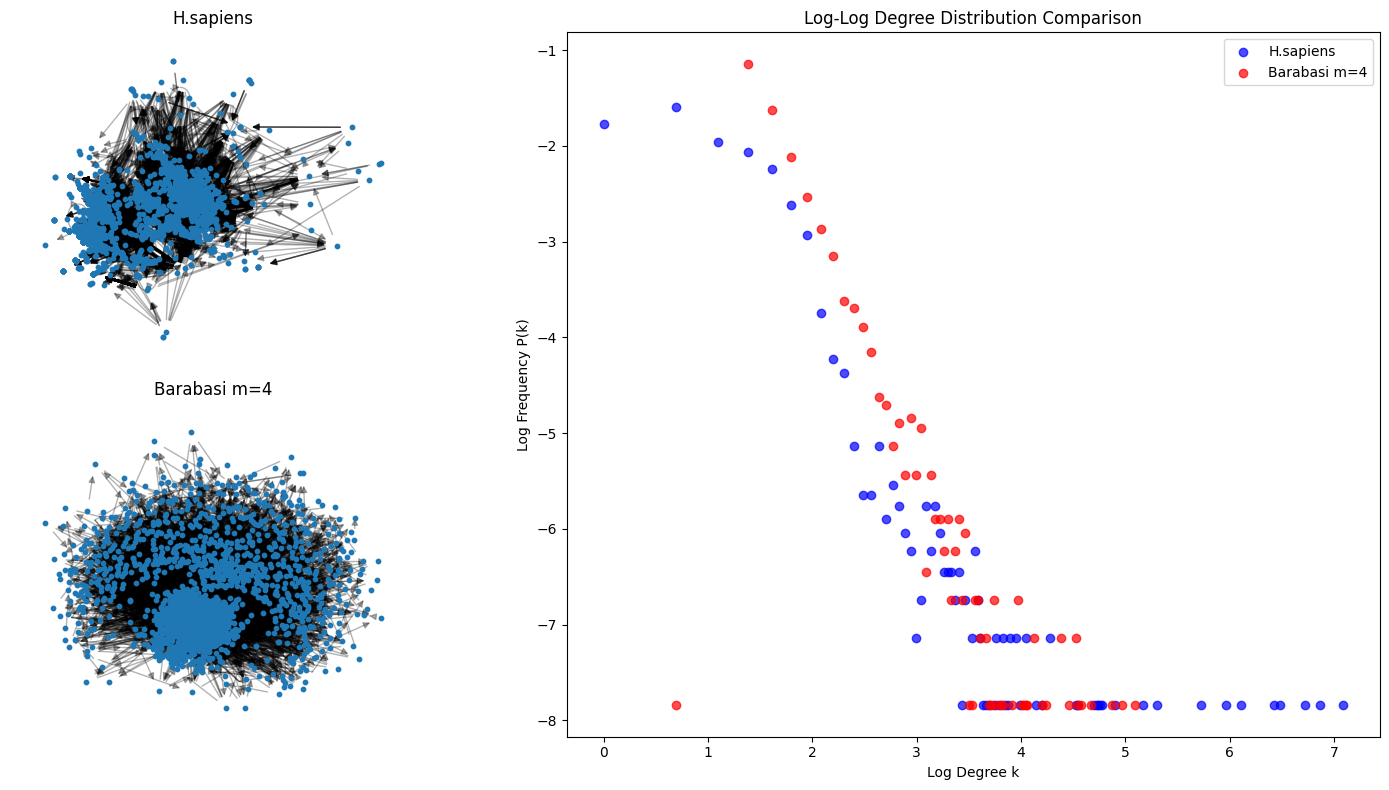

In [44]:
gg.plot_degree_network(g_largest_hsapiens, G_ba_directed[0],'H.sapiens', 'Barabasi m=4')